In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

/tmp/ipykernel_24294/162727573.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from datetime import datetime
df = pd.read_csv('../../data/bitcoin/price/bitcoin_chart.csv')
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df = df[(df['Date'] >= datetime.strptime('2022-01-01', '%Y-%m-%d').date()) & (df['Date'] < datetime.strptime('2023-01-01', '%Y-%m-%d').date())]
df

,Timestamp,Price,Market_Cap,Total_Volume,Date
3168,2022-01-01 00:00:00.000,46319.651088,8.761929e+11,2.589535e+10,2022-01-01
3169,2022-01-02 00:00:00.000,47816.077676,9.045519e+11,1.890459e+10,2022-01-02
3170,2022-01-03 00:00:00.000,47387.212168,8.975361e+11,3.375613e+10,2022-01-03
3171,2022-01-04 00:00:00.000,46531.140861,8.803302e+11,2.189002e+10,2022-01-04
3172,2022-01-05 00:00:00.000,45938.024272,8.762427e+11,2.489599e+10,2022-01-05
...,...,...,...,...,...
3528,2022-12-27 00:00:00.000,16900.081872,3.250369e+11,1.257500e+10,2022-12-27
3529,2022-12-28 00:00:00.000,16701.840211,3.213515e+11,1.743606e+10,2022-12-28
3530,2022-12-29 00:00:00.000,16538.906094,3.182889e+11,1.911361e+10,2022-12-29
3531,2022-12-30 00:00:00.000,16644.379087,3.202973e+11,1.568373e+10,2022-12-30


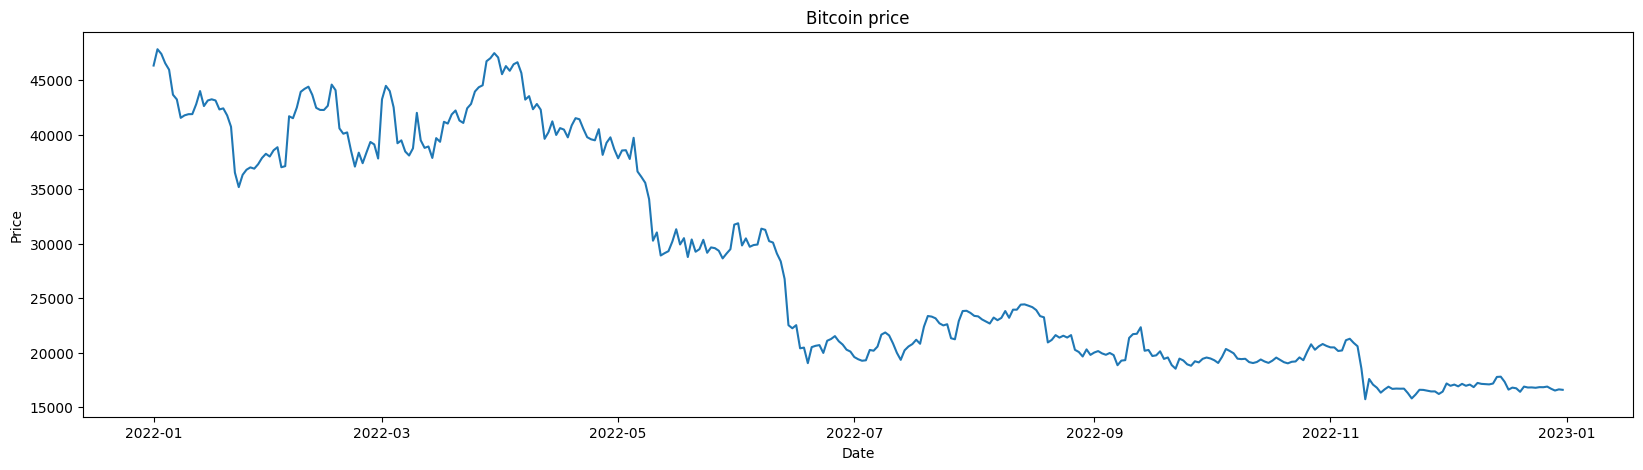

In [3]:
# plot the df with the price and the date
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin price')
plt.show()

In [4]:
price = df["Price"].values.tolist()
window_size = 30
skip = 1
l = len(price) - 1

In [5]:
from typing import List, Callable

class Deep_Evolution_Strategy:
    """
    A class representing the Deep Evolution Strategy algorithm.

    Attributes:
        weights (List[np.ndarray]): The initial weights for the algorithm.
        reward_function (Callable[[List[np.ndarray]], float]): The reward function used to evaluate the weights.
        population_size (int): The size of the population.
        sigma (float): The standard deviation for the mutation.
        learning_rate (float): The learning rate for updating the weights.

    Methods:
        _get_weight_from_population(weights, population): Returns the weights after applying mutation.
        get_weights(): Returns the current weights.
        train(epoch, print_every): Trains the algorithm for a specified number of epochs.
    """

    inputs = None

    def __init__(
        self,
        weights: List[np.ndarray],
        reward_function: Callable[[List[np.ndarray]], float],
        population_size: int,
        sigma: float,
        learning_rate: float
    ) -> None:
        """
        Initializes the Deep_Evolution_Strategy class.

        Args:
            weights (List[np.ndarray]): The initial weights for the algorithm.
            reward_function (Callable[[List[np.ndarray]], float]): The reward function used to evaluate the weights.
            population_size (int): The size of the population.
            sigma (float): The standard deviation for the mutation.
            learning_rate (float): The learning rate for updating the weights.

        Returns:
            None
        """
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights: List[np.ndarray], population: List[List[np.ndarray]]) -> List[np.ndarray]:
        """
        Returns the weights after applying mutation.

        Args:
            weights (List[np.ndarray]): The current weights.
            population (List[List[np.ndarray]]): The population of mutated weights.

        Returns:
            List[np.ndarray]: The weights after applying mutation.
        """
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
            
        return weights_population

    def get_weights(self) -> List[np.ndarray]:
        """
        Returns the current weights.

        Returns:
            List[np.ndarray]: The current weights.
        """
        return self.weights

    def train(self, epoch: int = 100, print_every: int = 1) -> None:
        """
        Trains the algorithm for a specified number of epochs.

        Args:
            epoch (int): The number of epochs to train the algorithm. Default is 100.
            print_every (int): The frequency of printing the reward during training. Default is 1.

        Returns:
            None
        """
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
                
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

In [6]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [7]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[0 : t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [8]:
from typing import Tuple

class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03
    BUY_ACTION = 1
    SELL_ACTION = 2

    def __init__(self, model, money, max_buy, max_sell):
        self.model = model
        
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence: List[np.ndarray]) -> Tuple[int, float]:
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), float(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        
        self.model.weights = weights
        state = get_state(price, 0, window_size + 1)
        
        inventory = []
        quantity = 0
        
        for t in range(0, l, skip):
            action, buy = self.act(state)
            next_state = get_state(price, t + 1, window_size + 1)
            
            if action == self.BUY_ACTION and initial_money > 0:
                if buy < 0:
                    # buy unit is 10% of what you can afford
                    buy_units = (initial_money * 0.1) / price[t]
                elif (buy * price[t]) > initial_money or buy > self.max_buy:
                    # if we want to buy more than we can afford
                    # restrict buy_units to the maximum we can buy with the money we have
                    # without going into debt and without exceeding the maximum buy limit
                    buy_units = min((initial_money * 0.9) / price[t], self.max_buy)
                else:
                    buy_units = buy
                    
                total_buy = buy_units * price[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                
            elif action == self.SELL_ACTION and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                    
                quantity -= sell_units
                total_sell = sell_units * price[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        state = get_state(price, 0, window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []

        inventory = []
        quantity = 0
        
        for t in range(0, l, skip):
            action, buy = self.act(state)
            next_state = get_state(price, t + 1, window_size + 1)
            if action == self.BUY_ACTION and initial_money > 0:
                if buy < 0:
                    # buy unit is 10% of what you can afford
                    buy_units = (initial_money * 0.1) / price[t]
                elif (buy * price[t]) > initial_money or buy > self.max_buy:
                    # if we want to buy more than we can afford
                    # restrict buy_units to the maximum we can buy with the money we have
                    # without going into debt and without exceeding the maximum buy limit
                    buy_units = min((initial_money * 0.9) / price[t], self.max_buy)
                else:
                    buy_units = buy
                    
                total_buy = buy_units * price[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                
                print(
                    'day %d: buy %f units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
                
            elif action == self.SELL_ACTION and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units <= 0:
                    continue
                   
                quantity -= sell_units
                total_sell = sell_units * price[t]
                initial_money += total_sell
                states_sell.append(t)
                
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                
                print(
                    'day %d, sell %f units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
                
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(price, label = 'true price', c = 'g')
        plt.plot(price, 'X', label = 'predict buy', markevery = states_buy, c = 'b')
        plt.plot(price, 'o', label = 'predict sell', markevery = states_sell, c = 'r')
        plt.legend()
        plt.show()

In [9]:
model = Model(window_size, 500, 3)
agent = Agent(model, 100, 5, 5)
agent.fit(500, 1)

/tmp/ipykernel_24294/2044061531.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.argmax(decision[0]), float(buy[0])


iter 1. reward: -38.252620
iter 2. reward: -30.907145
iter 3. reward: -25.649616
iter 4. reward: -20.052152
iter 5. reward: -17.790588
iter 6. reward: 3.019925
iter 7. reward: 12.104704
iter 8. reward: 26.710654
iter 9. reward: 27.981611
iter 10. reward: 52.170878
iter 11. reward: 83.968988
iter 12. reward: 93.321847
iter 13. reward: 65.821727
iter 14. reward: 80.856519
iter 15. reward: 107.926944
iter 16. reward: 95.674761
iter 17. reward: 84.865412
iter 18. reward: 113.266212
iter 19. reward: 101.794651
iter 20. reward: 113.186429
iter 21. reward: 124.857250
iter 22. reward: 127.533100
iter 23. reward: 134.524925
iter 24. reward: 150.501708
iter 25. reward: 144.255544
iter 26. reward: 165.280691
iter 27. reward: 151.445058
iter 28. reward: 150.098290
iter 29. reward: 161.030266
iter 30. reward: 186.449008
iter 31. reward: 157.394917
iter 32. reward: 162.943053
iter 33. reward: 171.442390
iter 34. reward: 169.259796
iter 35. reward: 200.536534
iter 36. reward: 229.041566
iter 37. rewa

day 0: buy 0.001943 units at price 90.000000, total balance 10.000000
day 1, sell 0.001943 units at price 92.907587, investment 3.230652 %, total balance 102.907587,
day 8: buy 0.002218 units at price 92.616828, total balance 10.290759
day 9: buy 0.000221 units at price 9.261683, total balance 1.029076
day 11: buy 0.000002 units at price 0.102908, total balance 0.926168
day 12: buy 0.000019 units at price 0.833551, total balance 0.092617
day 13, sell 0.002461 units at price 104.842778, investment 13.200571 %, total balance 104.935395,
day 14: buy 0.002190 units at price 94.441855, total balance 10.493539
day 15, sell 0.002190 units at price 94.673566, investment 922.206955 %, total balance 105.167105,


/tmp/ipykernel_24294/2044061531.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.argmax(decision[0]), float(buy[0])


day 22: buy 0.002690 units at price 94.650395, total balance 10.516711
day 24: buy 0.000257 units at price 9.465039, total balance 1.051671
day 25: buy 0.000026 units at price 0.946504, total balance 0.105167
day 26: buy 0.000003 units at price 0.094650, total balance 0.010517
day 27, sell 0.002976 units at price 110.934642, investment 17.204627 %, total balance 110.945159,
day 33: buy 0.002699 units at price 99.850643, total balance 11.094516
day 35, sell 0.002699 units at price 112.460789, investment 12.629008 %, total balance 123.555305,
day 36: buy 0.002680 units at price 111.199774, total balance 12.355530
day 37: buy 0.000262 units at price 11.119977, total balance 1.235553
day 38: buy 0.000025 units at price 1.111998, total balance 0.123555
day 39: buy 0.000003 units at price 0.111200, total balance 0.012356
day 40, sell 0.002970 units at price 131.800527, investment 18.525895 %, total balance 131.812883,
day 48: buy 0.000325 units at price 13.181288, total balance 118.631594
da

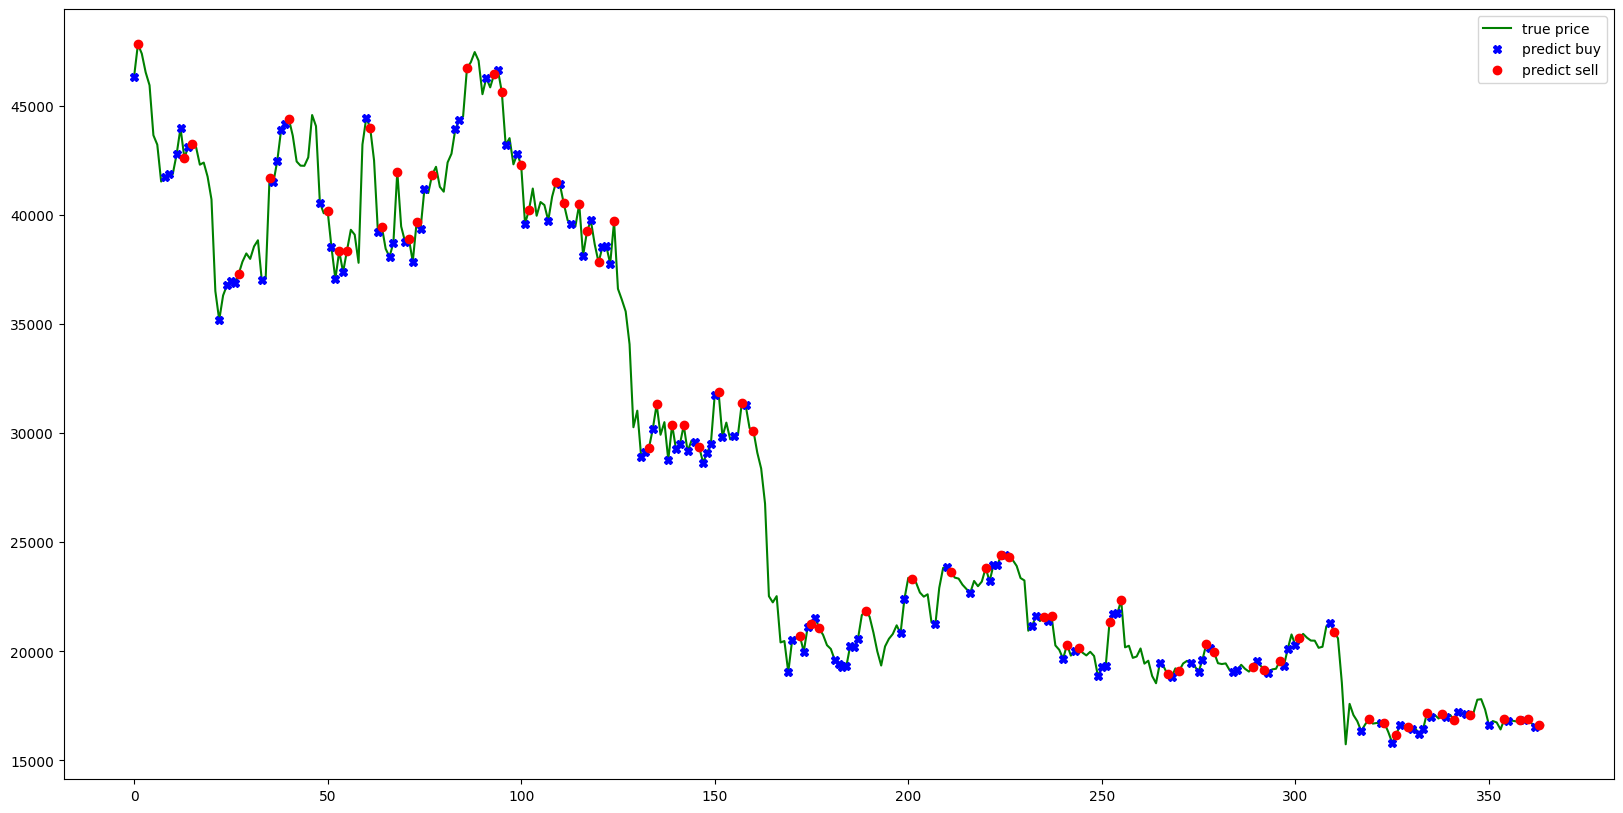

In [10]:
agent.buy()